In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import glob
import sys
#os.chdir('/Users/zofiikaczmarek/Desktop/work/PhillipsLab/git/mwc_growth/' + 
#         'code/processing/exploratory/20180312_20180501_fold_change_plots/') #get to the proper exploratory folder
sys.path.insert(0, '../../../../')
import mwc
mwc.viz.personal_style()
sns.set_palette('deep', n_colors=8)

In [9]:
# Load the data and assemble into one dataframe.
csv_files = glob.glob('./input/*flow_events.csv')
csv_files = np.sort(csv_files)

df = pd.DataFrame([], columns=['date', 'operator', 'carbon', 'temp', 'strain',
                               'atc_ngml', 'iptg_um', 'mean_fitc', 'fold_change'])

# This currently doesn't account for runs. 
# It works only if there are never two runs with the same carbon source on the same day.

for i, f in enumerate(csv_files):
    _df = pd.read_csv(f)
    df = df.append(_df,ignore_index=True)

df = df.sort_values(['date','carbon','atc_ngml','strain','iptg_um']).reset_index(drop=True)

In [10]:
df[:13]

,date,operator,carbon,temp,strain,atc_ngml,iptg_um,mean_fitc,fold_change
0,20180312,O2,glucose,37,auto,0.0,0.0,3954.718132,0.0
1,20180312,O2,glucose,37,auto,0.0,0.1,3907.844621,0.0
2,20180312,O2,glucose,37,auto,0.0,5.0,3987.787584,0.0
3,20180312,O2,glucose,37,auto,0.0,10.0,4029.473493,0.0
4,20180312,O2,glucose,37,auto,0.0,25.0,3998.273622,0.0
5,20180312,O2,glucose,37,auto,0.0,50.0,4010.407722,0.0
6,20180312,O2,glucose,37,auto,0.0,75.0,4081.961837,0.0
7,20180312,O2,glucose,37,auto,0.0,100.0,3826.898313,0.0
8,20180312,O2,glucose,37,auto,0.0,250.0,3966.592076,0.0
9,20180312,O2,glucose,37,auto,0.0,500.0,4003.773354,0.0


In [11]:
df[-13:-1]

,date,operator,carbon,temp,strain,atc_ngml,iptg_um,mean_fitc,fold_change
751,20180501,O2,glycerol,37,dilution,7.0,5000.0,46623.738644,0.903173
752,20180501,O2,glycerol,37,dilution,10.0,0.0,5634.596921,-0.130310
753,20180501,O2,glycerol,37,dilution,10.0,0.1,5830.833752,-0.118955
754,20180501,O2,glycerol,37,dilution,10.0,5.0,7100.718453,-0.082973
755,20180501,O2,glycerol,37,dilution,10.0,10.0,9302.576517,-0.041610
756,20180501,O2,glycerol,37,dilution,10.0,25.0,16605.926384,0.144248
757,20180501,O2,glycerol,37,dilution,10.0,50.0,25626.984622,0.368430
758,20180501,O2,glycerol,37,dilution,10.0,75.0,32747.818094,0.533622
759,20180501,O2,glycerol,37,dilution,10.0,100.0,34665.905116,0.602621
760,20180501,O2,glycerol,37,dilution,10.0,250.0,44563.506579,0.859945


In [12]:
# Generate a plot of fold-change values as a function of IPTG.

# Create dataframe with only dilution strain entries.
dil = df[(df['strain']!='auto') & (df['strain']!='delta')]

In [13]:
dil[:13]

,date,operator,carbon,temp,strain,atc_ngml,iptg_um,mean_fitc,fold_change
24,20180312,O2,glucose,37,dilution,1.0,0.0,6891.696129,0.159842
25,20180312,O2,glucose,37,dilution,1.0,0.1,7739.350171,0.222161
26,20180312,O2,glucose,37,dilution,1.0,5.0,9995.047081,0.298844
27,20180312,O2,glucose,37,dilution,1.0,10.0,10532.266228,0.345400
28,20180312,O2,glucose,37,dilution,1.0,25.0,15276.714902,0.644562
29,20180312,O2,glucose,37,dilution,1.0,50.0,17796.531280,0.882686
30,20180312,O2,glucose,37,dilution,1.0,75.0,19481.070133,1.003721
31,20180312,O2,glucose,37,dilution,1.0,100.0,17765.800936,0.933196
32,20180312,O2,glucose,37,dilution,1.0,250.0,21458.859722,1.070278
33,20180312,O2,glucose,37,dilution,1.0,500.0,20505.684340,1.011467


In [ ]:
#pd.options.display.max_rows

#pd.set_option("display.max_rows", 600)
#print(dil)
#pd.set_option("display.max_rows", 60)

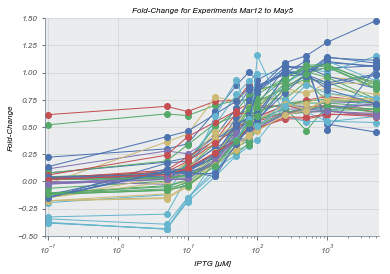

In [43]:
# Fold-change for all the experiment plotted todgether.

plt.figure()

grouped = dil.groupby(['atc_ngml','date','carbon'])
for group, data in grouped:
    plt.semilogx(data['iptg_um'], data['fold_change'], '-o', lw=1, label=group)
plt.xlabel('IPTG [µM]')
plt.ylabel('Fold-Change')
#plt.legend(loc='upper left', title='aTc (ng/mL)')
plt.ylim([-.5, 1.5])
plt.title("Fold-Change for Experiments Mar12 to May5")
plt.show()

(-0.1, 1.5)

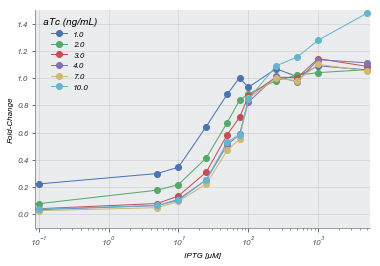

In [20]:
# Fold-change for a single experiment.

plt.figure()
grouped = dil[(dil['date']==20180312) & (dil['carbon']=='glucose')].groupby('atc_ngml') # f-c up to 1.5
#grouped = dil[(dil['date']==20180314) & (dil['carbon']=='glucose')].groupby('atc_ngml')
#grouped = dil[(dil['date']==20180426) & (dil['carbon']=='glucose')].groupby('atc_ngml') # some negative f-c

#grouped = dil[(dil['date']==20180419) & (dil['carbon']=='glycerol')].groupby('atc_ngml')
#grouped = dil[(dil['date']==20180426) & (dil['carbon']=='glycerol')].groupby('atc_ngml')
#grouped = dil[(dil['date']==20180427) & (dil['carbon']=='glycerol')].groupby('atc_ngml')
#grouped = dil[(dil['date']==20180430) & (dil['carbon']=='glycerol')].groupby('atc_ngml') # some negative f-c
#grouped = dil[(dil['date']==20180501) & (dil['carbon']=='glycerol')].groupby('atc_ngml')

#grouped = dil[(dil['date']!=20180501) & (dil['date']!=20180430) & (dil['date']!=20180427) & (dil['date']!=20180426) & 
#              (dil['date']!=20180419) & (dil['date']!=20180314) & (dil['date']!=20180312) 
#              & ((dil['carbon']=='glycerol') | (dil['carbon']=='glucose'))].groupby('atc_ngml')

for group, data in grouped:
    plt.semilogx(data['iptg_um'], data['fold_change'], '-o', lw=1, label=group)
plt.xlabel('IPTG [µM]')
plt.ylabel('Fold-Change')
plt.legend(loc='upper left', title='aTc (ng/mL)')
plt.ylim([-.1, 1.5])

In [26]:
pd.set_option("display.max_rows", 20)

# Find the mean and standard error of fold-change per atc concentration and carbon source, 
# averaged over all experiments (excluding auto and delta).

# [["date","carbon","iptg_um","atc_ngml","fold_change"]]
#fc_means = dil.groupby(['carbon','iptg_um','atc_ngml'], as_index=False).mean()
#fc_means = fc_means.loc[:,['carbon','atc_ngml','fold_change']]

fc_agg = dil.groupby(['carbon','iptg_um','atc_ngml']).fold_change.agg(['mean', 'sem']).reset_index()
fc_agg.rename(columns = {'mean':'fc_mean','sem':'fc_sem'}, inplace = True)
fc_agg

,carbon,iptg_um,atc_ngml,fc_mean,fc_sem
0,glucose,0.0,1.0,0.233027,0.094550
1,glucose,0.0,2.0,0.046647,0.025833
2,glucose,0.0,3.0,0.023735,0.016289
3,glucose,0.0,4.0,0.010878,0.013875
4,glucose,0.0,7.0,0.006199,0.014033
5,glucose,0.0,10.0,0.004911,0.013488
6,glucose,0.1,1.0,0.285394,0.121300
7,glucose,0.1,2.0,0.050826,0.025749
8,glucose,0.1,3.0,0.022885,0.018409
9,glucose,0.1,4.0,0.012133,0.016283


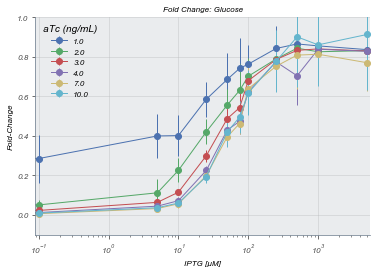

In [44]:
# Plot the mean fold-change values as a function of IPTG, per atc concentration for glucose.
plt.figure()

grouped = fc_agg[fc_agg['carbon']=='glucose'].groupby(['atc_ngml','carbon'])
for group, data in grouped:
    #plt.semilogx(data['iptg_um'], data['fold_change'], '-o', lw=1, label=group) #no error bars
    plt.errorbar(data['iptg_um'], data['fc_mean'], yerr=data['fc_sem'], marker='o', lw=1, label=group[0])
plt.xscale('log')
plt.xlabel('IPTG [µM]')
plt.ylabel('Fold-Change')
plt.legend(loc='upper left', title='aTc (ng/mL)')
plt.ylim([-.1, 1])
plt.title("Fold Change: Glucose")
plt.savefig('output/20180312_20180501_fold_change_IPTG_titration_Glucose.png', bbox_inches='tight')

Text(0.5,1,'Fold Change: Glycerol')

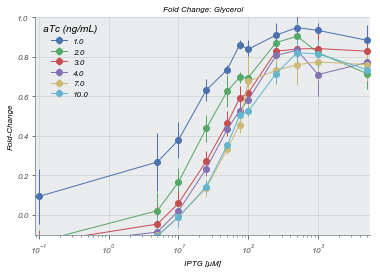

In [28]:
# Plot the mean fold-change values as a function of IPTG, per atc concentration for glycerol.
plt.figure()

grouped = fc_agg[fc_agg['carbon']=='glycerol'].groupby(['atc_ngml','carbon'])
for group, data in grouped:
    plt.errorbar(data['iptg_um'], data['fc_mean'], yerr=data['fc_sem'], marker='o', lw=1, label=group[0])
plt.xscale('log')
plt.xlabel('IPTG [µM]')
plt.ylabel('Fold-Change')
plt.legend(loc='upper left', title='aTc (ng/mL)')
plt.ylim([-.1, 1])
plt.title("Fold Change: Glycerol")
plt.savefig('output/20180312_20180501_fold_change_IPTG_titration_Glycerol.png', bbox_inches='tight')

In [33]:
# Find the mean and standard error of YFP intensity (fitc) per atc concentration, carbon source, and strain,
# averaged over all experiments (using only auto and delta).

yfp_agg = df[(df['strain']=='auto')|(df['strain']=='delta')].groupby(
    ['strain','carbon','iptg_um']).mean_fitc.agg(['mean', 'sem']).reset_index()
yfp_agg.rename(columns = {'mean':'yfp_mean','sem':'yfp_sem'}, inplace = True)
yfp_agg

,strain,carbon,iptg_um,yfp_mean,yfp_sem
0,auto,glucose,0.0,4868.879402,846.862801
1,auto,glucose,0.1,4994.511994,1059.732593
2,auto,glucose,5.0,4914.725687,923.841247
3,auto,glucose,10.0,4934.922525,960.175356
4,auto,glucose,25.0,5063.533220,1052.354600
5,auto,glucose,50.0,4974.316796,973.151555
6,auto,glucose,75.0,4806.186131,791.540179
7,auto,glucose,100.0,4347.609998,438.589570
8,auto,glucose,250.0,4573.397903,634.289810
9,auto,glucose,500.0,4060.880203,891.777434


Text(0.5,1,'YFP for auto and delta strains')

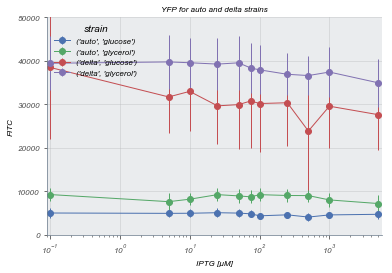

In [46]:
# Plot mean auto and delta YFP values as a function of IPTG, per strain and carbon source.
plt.figure()

grouped = yfp_agg[yfp_agg['carbon']=='glucose'].groupby('strain')
for group, data in grouped:
    plt.errorbar(data['iptg_um'], data['yfp_mean'], yerr=data['yfp_sem'], marker='o', lw=1, label=group)
plt.xscale('log')
plt.xlabel('IPTG [µM]')
plt.ylabel('FITC')
plt.legend(loc='upper left', title='strain')
plt.ylim([-.1, 50000])
plt.title("YFP: Glucose")
plt.savefig('output/20180312_20180501_YFP_Controls_IPTG_titration_Glucose.png', bbox_inches='tight')

Text(0.5,1,'YFP: Glycerol')

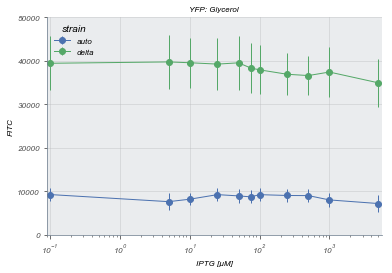

In [41]:
# Plot mean auto and delta YFP values as a function of IPTG, per atc concentration for glycerol.
plt.figure()

grouped = yfp_agg[yfp_agg['carbon']=='glycerol'].groupby('strain')
for group, data in grouped:
    plt.errorbar(data['iptg_um'], data['yfp_mean'], yerr=data['yfp_sem'], marker='o', lw=1, label=group)
plt.xscale('log')
plt.xlabel('IPTG [µM]')
plt.ylabel('FITC')
plt.legend(loc='upper left', title='strain')
plt.ylim([-.1, 50000])
plt.title("YFP: Glycerol")
plt.savefig('output/20180312_20180501_YFP_Controls_IPTG_titration_Glycerol.png', bbox_inches='tight')